In [1]:
# 20.2 Designing a Neural Network
# Load libraries
from keras import models
from keras import layers
# Start neural network
network=models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,activation="relu",input_shape=(10,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1,activation="sigmoid"))
# Compile neural 
network.compile(loss="binary_crossentropy",# Cross-entropy
optimizer="rmsprop",# Root Mean Square Propagation
metrics=["accuracy"])# Accuracy performance metric

In [2]:
#20.3 Training a BinaryClassiﬁer
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features=1000
# Load data and target vector from movie review data
(data_train,target_train),(data_test,target_test)=imdb.load_data(
num_words=number_of_features)
# Convert movie review data to one-hot encoded feature matrix
tokenizer=Tokenizer(num_words=number_of_features)
features_train=tokenizer.sequences_to_matrix(data_train,mode="binary")
features_test=tokenizer.sequences_to_matrix(data_test,mode="binary")
# Start neural network
network=models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,activation="relu",input_shape=(
number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1,activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy",# Cross-entropy
                optimizer="rmsprop",# Root Mean Square Propagation
                metrics=["accuracy"])# Accuracy performance metric
# Train neural network
history=network.fit(features_train,# Features
                    target_train,# Target vector
                    epochs=3,# Number of epochs
                    verbose=1,# Print description after each epoch
                    batch_size=100,# Number of observations per batch
                    validation_data=(features_test,target_test))# Test data

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/3
250/250 [==============================] - 8s 6ms/step - loss: 0.4419 - accuracy: 0.7940 - val_loss: 0.3373 - val_accuracy: 0.8565
Epoch 2/3
250/250 [==============================] - 1s 5ms/step - loss: 0.3256 - accuracy: 0.8641 - val_loss: 0.3303 - val_accuracy: 0.8584
Epoch 3/3
250/250 [==============================] - 1s 4ms/step - loss: 0.3151 - accuracy: 0.8689 - val_loss: 0.3268 - val_accuracy: 0.8589


In [3]:
#20.4 Training a MulticlassClassiﬁer
# Load libraries
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 5000

# Load feature and target data
(data_train, target_vector_train), (data_test, target_vector_test) = reuters.load_data(num_words=number_of_features)

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# One-hot encode target vector to create a target matrix
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation="relu", input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation="relu"))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46, activation="softmax"))

# Compile neural network
network.compile(
    loss="categorical_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target
    epochs=3,  # Three epochs
    verbose=0,  # No output
    batch_size=100,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)
# View target matrix
target_train


2110848/2110848 [==============================] - 0s 0us/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
#20.5 Training a Regressor
# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Set random seed
np.random.seed(0)

# Generate features matrix and target vector
features, target = make_regression(
    n_samples=10000, n_features=3, n_informative=3, n_targets=1, noise=0.0, random_state=0
)

# Divide our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.33, random_state=0
)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu", input_shape=(features_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu"))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(
    loss="mse",  # Mean squared error
    optimizer="RMSprop",  # Optimization algorithm
    metrics=["mse"]  # Mean squared error
)

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target vector
    epochs=10,  # Number of epochs
    verbose=0,  # No output
    batch_size=100,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)


In [5]:
#20.6 Making Predictions
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 10000

# Load data and target vector from IMDB movie data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert IMDB data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(
    loss="binary_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target vector
    epochs=3,  # Number of epochs
    verbose=0,  # No output
    batch_size=100,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)

# Predict classes of test set
predicted_target = network.predict(features_test)
# View the probability the first observation is class 1
predicted_target[0]


782/782 [==============================] - 2s 3ms/step


array([0.13725968], dtype=float32)

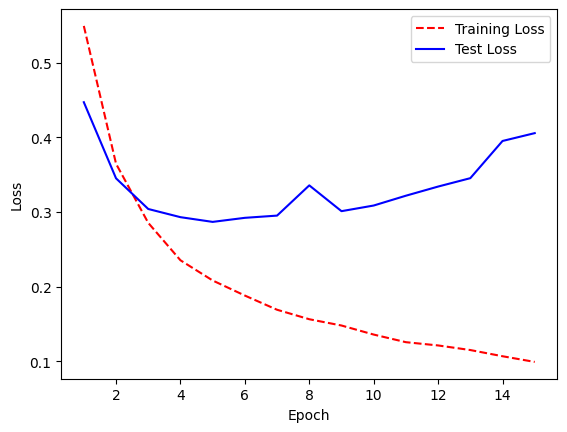

In [6]:
#20.7 Visualize Training History
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(
    loss="binary_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target
    epochs=15,  # Number of epochs
    verbose=0,  # No output
    batch_size=1000,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)

# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


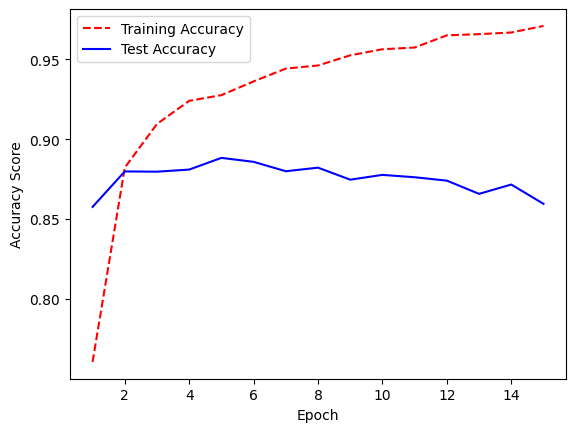

In [7]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(
    loss="binary_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target
    epochs=15,  # Number of epochs
    verbose=0,  # No output
    batch_size=1000,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)

# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()


In [8]:
#20.8 ReducingOverﬁttingwith Weight Regularization
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
from keras import regularizers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(
    loss="binary_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target vector
    epochs=3,  # Number of epochs
    verbose=0,  # No output
    batch_size=100,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)


In [9]:
#20.9 ReducingOverﬁttingwith Early Stopping
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(
    loss="binary_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Set callback functions to early stop training and save the best model so far
callbacks = [
    EarlyStopping(monitor="val_loss", patience=2),
    ModelCheckpoint(filepath="best_model.h5", monitor="val_loss", save_best_only=True)
]

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target vector
    epochs=20,  # Number of epochs
    callbacks=callbacks,  # Early stopping and model checkpoint
    verbose=0,  # No output
    batch_size=100,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)


In [10]:
#20.10  ReducingOverﬁttingwith Dropout
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = Sequential()

# Add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(
    loss="binary_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target vector
    epochs=3,  # Number of epochs
    verbose=0,  # No output
    batch_size=100,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)


In [11]:
#20.11 Saving Model Training Progress
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(
    loss="binary_crossentropy",  # Cross-entropy
    optimizer="rmsprop",  # Root Mean Square Propagation
    metrics=["accuracy"]  # Accuracy performance metric
)

# Set callback functions to save the best model
callbacks = [ModelCheckpoint(filepath="models.hdf5", save_best_only=True)]

# Train neural network
history = network.fit(
    features_train,  # Features
    target_train,  # Target vector
    epochs=3,  # Number of epochs
    callbacks=callbacks,  # Checkpoint
    verbose=0,  # No output
    batch_size=100,  # Number of observations per batch
    validation_data=(features_test, target_test)  # Test data
)


In [12]:
#20.12 k-Fold Cross-Validating Neural Networks
# Load libraries
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(
    n_samples=10000,
    n_features=number_of_features,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[0.5, 0.5],
    random_state=0
)

# Create function returning a compiled network
def create_network():
    # Start neural network
    network = Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Compile neural network
    network.compile(
        loss="binary_crossentropy",  # Cross-entropy
        optimizer="rmsprop",  # Root Mean Square Propagation
        metrics=["accuracy"]  # Accuracy performance metric
    )

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, epochs=10, batch_size=100, verbose=0)

# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=3)


<ipython-input-12-bcf52c5d2bbf>:52: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasClassifier(build_fn=create_network, epochs=10, batch_size=100, verbose=0)


array([0.90341932, 0.90099013, 0.85268527])

In [ ]:
#20.13 Tuning Neural Networks
# Load libraries
import numpy as np
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(
    n_samples=10000,
    n_features=number_of_features,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[0.5, 0.5],
    random_state=0
)

# Create function returning a compiled network
def create_network(optimizer="rmsprop"):
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Compile neural network
    network.compile(
        loss="binary_crossentropy",  # Cross-entropy
        optimizer=optimizer,  # Optimizer
        metrics=["accuracy"]  # Accuracy performance metric
    )

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(features, target)


In [ ]:
# View hyperparameters of best neural network
grid_result.best_params_

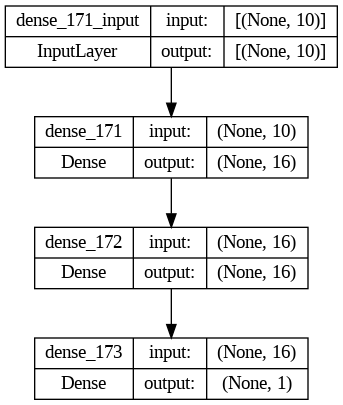

In [14]:
#20.14  Visualizing Neural Networks
# Load libraries
from keras import models, layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

# Save the visualization as a file
plot_model(network, show_shapes=True, to_file="network.png")


In [17]:
#20.15 Classifying Images
# Load libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28

# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], height, width, channels)

# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(height, width, channels), activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Train neural network
network.fit(features_train, target_train, epochs=2, verbose=0, batch_size=1000, validation_data=(features_test, target_test))


In [ ]:
#20.16 Improving Performance with Image Augmentation
# Load libraries
from keras.preprocessing.image import ImageDataGenerator

# Create image augmentation
augmentation = ImageDataGenerator(
    featurewise_center=True,  # Apply ZCA whitening
    zoom_range=0.3,  # Randomly zoom in on images
    width_shift_range=0.2,  # Randomly shift images
    horizontal_flip=True,  # Randomly flip images
    rotation_range=90  # Randomly rotate
)

# Process all images from the directory 'raw/images'
augment_images = augmentation.flow_from_directory(
    "raw/images",  # Image folder
    batch_size=32,  # Batch size
    class_mode="binary",  # Classes
    save_to_dir="processed/images"  # Save augmented images
)

# Process all images from the directory 'raw/images' for validation
augment_images_validation = augmentation.flow_from_directory(
    "raw/images",  # Image folder
    batch_size=32,  # Batch size
    class_mode="binary"  # Classes
)

# Train neural network
network.fit_generator(
    augment_images,
    steps_per_epoch=2000,  # Number of times to call the generator for each epoch
    epochs=5,  # Number of epochs
    validation_data=augment_images_validation,  # Validation data generator
    validation_steps=800  # Number of items to call the generator for each validation epoch
)


In [22]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Use padding or truncation to make each observation have 400 features
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

# Start neural network
network = Sequential()

# Add an embedding layer
network.add(Embedding(input_dim=number_of_features, output_dim=128))

# Add a long short-term memory layer with 128 units
network.add(LSTM(units=128))

# Add fully connected layer with a sigmoid activation function
network.add(Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

# Train neural network
history = network.fit(features_train, target_train, epochs=3, verbose=0, batch_size=1000, validation_data=(features_test, target_test))


In [23]:
# View first observation
print(data_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [24]:
# View first observation
print(features_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   